In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.set_index('PassengerId', inplace=True)

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### How many people survived? And in percentage?

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### What is the percentage of survivors within each class?

In [10]:
df_survivors_per_class = df[['Survived', 'Pclass']].groupby('Pclass')['Survived'].value_counts(normalize=True).rename('Percentage').reset_index()

In [11]:
df_survivors_per_class

,Pclass,Survived,Percentage
0,1,1,0.629630
1,1,0,0.370370
2,2,0,0.527174
3,2,1,0.472826
4,3,0,0.757637
5,3,1,0.242363


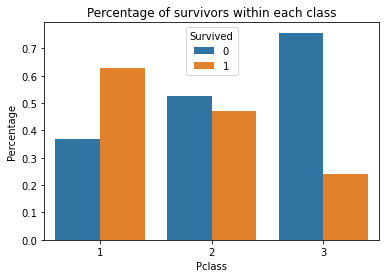

In [12]:
sns.barplot(data=df_survivors_per_class, x='Pclass', y='Percentage', hue='Survived')
plt.title('Percentage of survivors within each class')
plt.show()

### Which sex survived more?

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df_survivors_per_sex = df[['Sex', 'Survived']].groupby('Sex')['Survived'].value_counts(normalize=True).rename('Percentage').reset_index()

In [15]:
df_survivors_per_sex

,Sex,Survived,Percentage
0,female,1,0.742038
1,female,0,0.257962
2,male,0,0.811092
3,male,1,0.188908


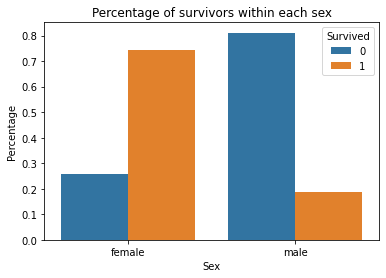

In [16]:
sns.barplot(data=df_survivors_per_sex, x='Sex', y='Percentage', hue='Survived')
plt.title('Percentage of survivors within each sex')
plt.show()

## How old were the youngest and the oldest person?

In [17]:
df['Age'].min()

0.42

In [18]:
df['Age'].max()

80.0

## Show the distribution of age between survivors and non-survivors

<AxesSubplot:>

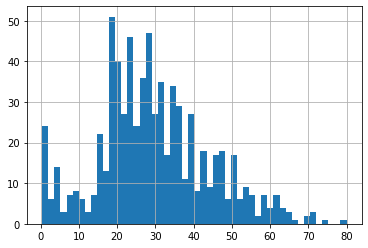

In [19]:
# All passengers
df['Age'].hist(bins=50)

<AxesSubplot:>

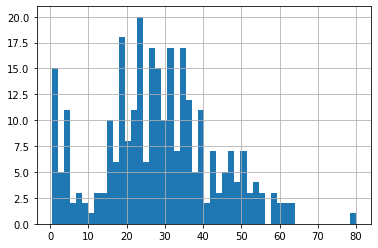

In [20]:
# Survivors
df[df['Survived'] == 1]['Age'].hist(bins=50)

<AxesSubplot:>

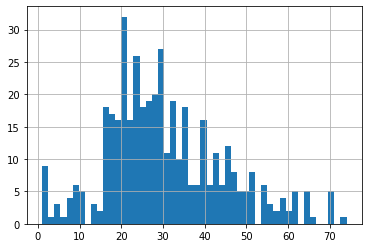

In [21]:
# Non-Survivors
df[df['Survived'] == 0]['Age'].hist(bins=50)